In [2]:
from src.engine import ReachabilityEngine
from src.canonical import canonical_key

def reachable_keys(proto: str, n: int, depth: int = 10):
    """Return the set of canonical keys reachable by protocol `proto`"""
    eng = ReachabilityEngine(proto)
    res = eng.bfs(n, depth)
    return {k for layer in res["layers"].values() for k in layer}

# compare CO and LNS for n = 4
keys_co  = reachable_keys("CO", 4)
keys_lns = reachable_keys("LNS", 4)

extra = keys_lns - keys_co
print("Extra keys in LNS but not CO:", len(extra))
for k in extra:
    print(k)



Extra keys in LNS but not CO: 1
((0, 1, 2), (0, 1, 2, 3), (0, 1, 2, 3), (1, 2, 3))


In [3]:
def key_to_str(key):
    return ', '.join(''.join(chr(i+65) for i in tup) for tup in key)

for k in extra:
    print(key_to_str(k))



ABC, ABCD, ABCD, BCD


In [4]:
from src.metrics import expected_length
for n in range(2, 11):
    print(n, expected_length("ANY", n, runs=5000))


ANY2: 100%|████████████████████████████████████████████| 5000/5000 [00:00<00:00, 214036.60it/s]


2 1.0


ANY3: 100%|█████████████████████████████████████████████| 5000/5000 [00:00<00:00, 67073.23it/s]


3 3.997


ANY4: 100%|█████████████████████████████████████████████| 5000/5000 [00:00<00:00, 35104.95it/s]


4 7.619


ANY5: 100%|█████████████████████████████████████████████| 5000/5000 [00:00<00:00, 19701.28it/s]


5 11.6882


ANY6: 100%|█████████████████████████████████████████████| 5000/5000 [00:00<00:00, 12499.88it/s]


6 16.277


ANY7: 100%|██████████████████████████████████████████████| 5000/5000 [00:00<00:00, 8178.16it/s]


7 20.9222


ANY8: 100%|██████████████████████████████████████████████| 5000/5000 [00:00<00:00, 5807.28it/s]


8 25.986


ANY9: 100%|██████████████████████████████████████████████| 5000/5000 [00:01<00:00, 4193.09it/s]


9 31.2344


ANY10: 100%|█████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3013.47it/s]

10 36.6074


ANY10: 100%|█████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2892.74it/s]


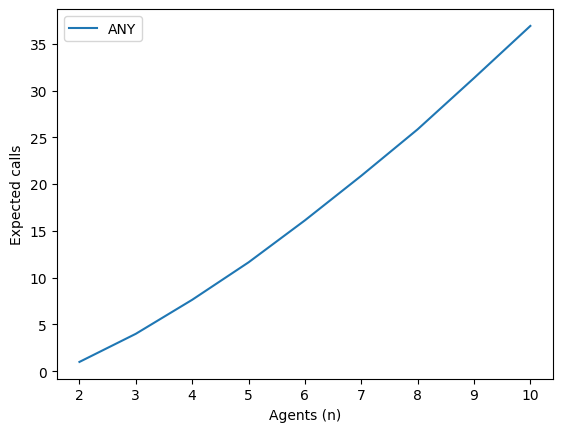

In [11]:
import matplotlib.pyplot as plt
ns = list(range(2, 11))
plt.plot(ns, [expected_length("ANY", n, 2000) for n in ns], label="ANY")
plt.xlabel("Agents (n)"); plt.ylabel("Expected calls")
plt.legend(); plt.show()


In [15]:
python for proto in [\"TOK\",\"SPI\",\"CO\",\"LNS\"]:\n plt.plot(ns, [expected_length(proto, n, 2000) for n in ns], label=proto)

SyntaxError: invalid syntax (3345871854.py, line 1)